In [338]:
%cd C:

C:\


In [1]:
from yolov5 import train, val, detect, export
import yolov5
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import easyocr
from PIL import Image, ImageOps
# import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'S:\Tesseract\tesseract.exe'
%cd D:\Projects\plate-recognition\core-model

[Errno 2] No such file or directory: 'D:Projectsplate-recognitioncore-model'
/home/mat/plate/plate-recognition/core-model


In [200]:
img = "tet4.jpeg"
weights = "best_model.pt"

In [201]:
model = yolov5.load(weights)

In [202]:
# Set the confidence threshold value
model.conf = 0.15

# inference with larger input size
results = model(img)

# inference with test time augmentation
results = model(img, augment=True)

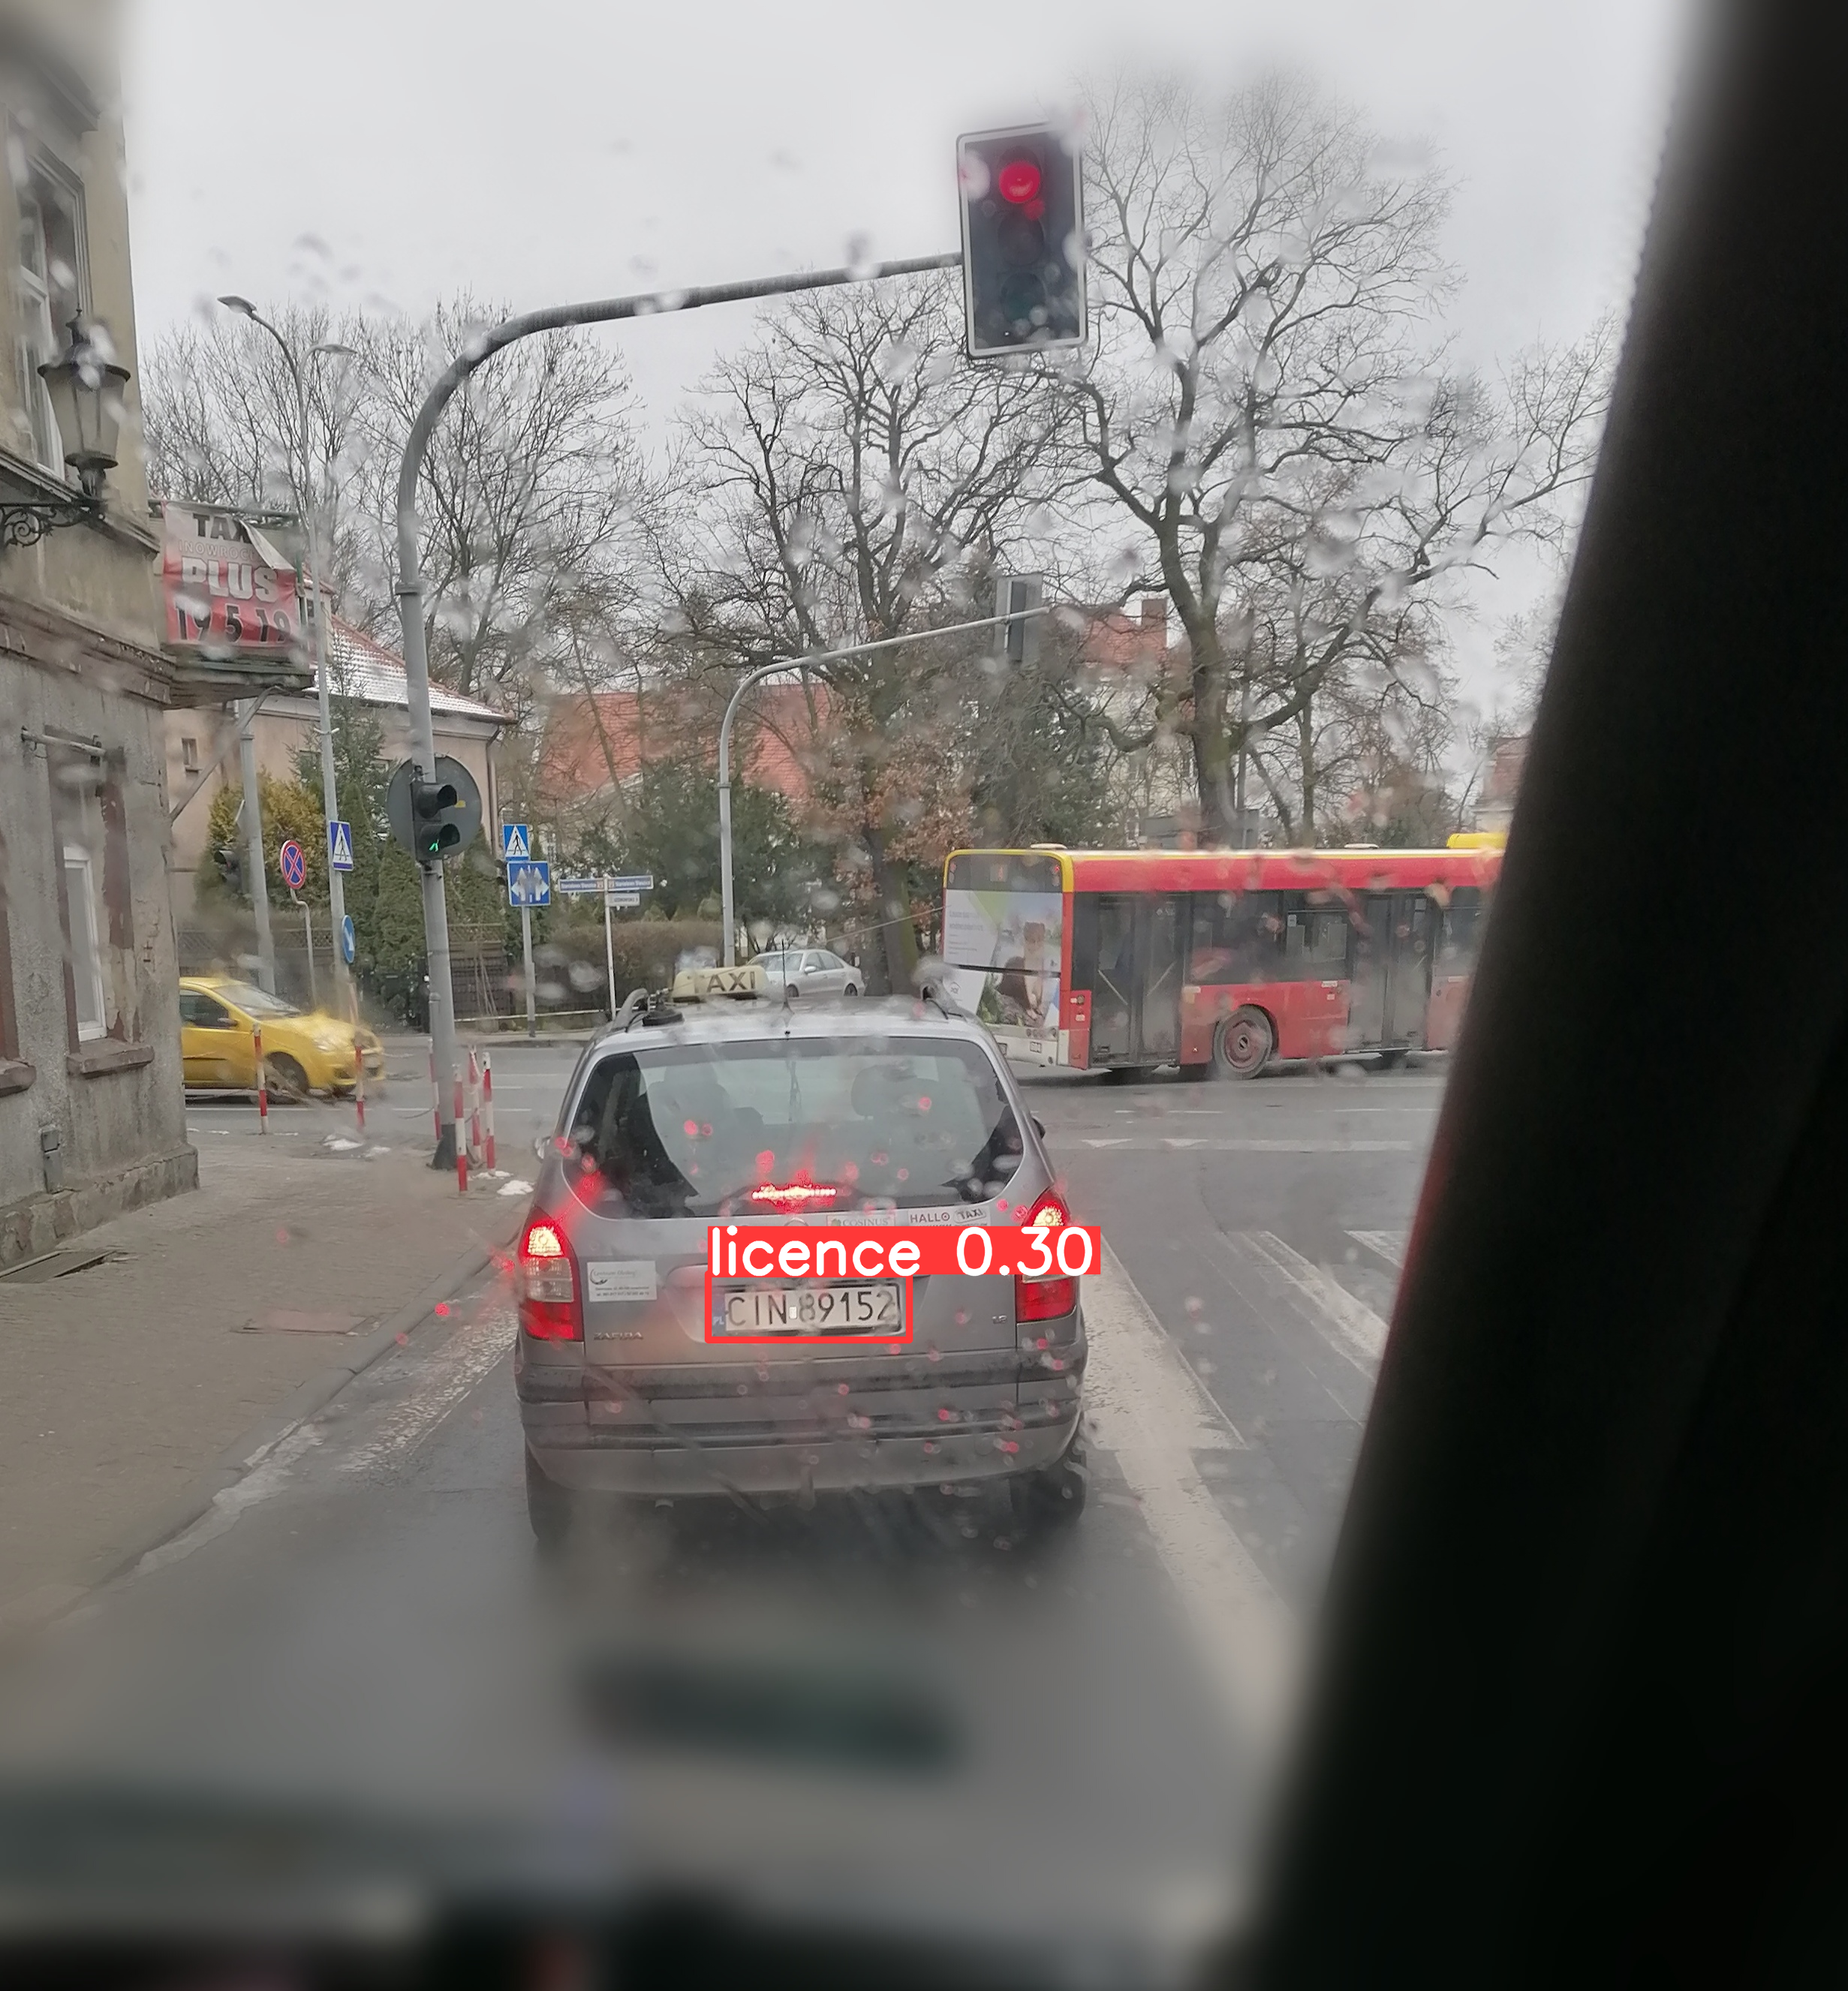

In [203]:
# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

In [204]:
image = Image.open(img)
# flipped_image = image.rotate(270, expand=True)
image = image.crop((boxes[0][0].item(), boxes[0][1].item(), boxes[0][2].item(), boxes[0][3].item()))

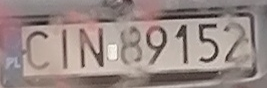

In [205]:
image

In [ ]:
# TO DO


In [ ]:
image

In [206]:
cropped_array = np.asarray(image)

In [207]:
reader = easyocr.Reader(['pl','de'], gpu=True) # this needs to run only once to load the model into memory

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [208]:
result = reader.readtext(cropped_array, detail=0)

In [209]:
result

['EIN8912']

In [210]:
# pytesseract.image_to_string(Image.open(image))